# Thesis' code

# Part 3

# 3.1 Graphs and tables

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import json 


In [2]:
ticker_list = ['SBER', 'GAZP', 'LKOH', 'NVTK', 'ROSN', 'GMKN', 'TATN', 'SNGS'] 


In [3]:
models_list = ['HAR', 'Lasso', 'Lasso_s', 'RF', 'RF_s', 'XGB', 'XGB_s',
               'NN_16', 'NN_s_16', 'NN_32', 'NN_s_32', 'NN_64', 'NN_s_64',
               'J_3_20', 'J_s_3_20', 'J_5_50', 'J_s_5_50',
               'E_3_20', 'E_s_3_20', 'E_5_50', 'E_s_5_50',
               'LSTM_3_20', 'LSTM_s_3_20', 'LSTM_5_50', 'LSTM_s_5_50',
               'GRU_3_20', 'GRU_s_3_20', 'GRU_5_50', 'GRU_s_5_50']


In [4]:
ticker_list.sort()
ticker_list

['GAZP', 'GMKN', 'LKOH', 'NVTK', 'ROSN', 'SBER', 'SNGS', 'TATN']

### Section 1 
Comparison over the whole period

In [46]:
res_t = pd.DataFrame(columns=['model']+ticker_list, index=range(58))

c = 0
for m_name in models_list: 
    for s in ['_rv', '_all']:
        m = m_name+s
        res_t.loc[c, 'model'] = m
        for t in ticker_list:
            res_path = 'results/' + m_name + '/' + t + s+ '.json'
            with open(res_path, 'r') as f:
                r = json.load(f)
            res_t.loc[c, t] = r['result']['mse']
        c+=1

res_t.set_index('model', inplace=True)   
    
res_t['Mean'] = res_t.mean(axis=1) 


In [47]:
data_descr = []
m_names = ['HAR', 'Lasso', 'Lasso', 'RF', 'RF', 'XGB', 'XGB',
           'NN$_{16}$', 'NN$_{16}$', 'NN$_{32}$', 'NN$_{32}$', 'NN$_{64}$', 'NN$_{64}$',
           'JNN$_{20}$', 'JNN$_{20}$', 'JNN$_{50}$', 'JNN$_{50}$',
           'ENN$_{20}$', 'ENN$_{20}$', 'ENN$_{50}$', 'ENN$_{50}$',
           'LSTM$_{20}$', 'LSTM$_{20}$', 'LSTM$_{50}$', 'LSTM$_{50}$', 
           'GRU$_{20}$', 'GRU$_{20}$', 'GRU$_{50}$', 'GRU$_{50}$']
for x in models_list:
    if '_s' in x:
        data_descr.append('scaled')
    else: 
        data_descr.append('unscaled')
    
data_d = []
m_n = []
for i in range(len(data_descr)):
    for s in ['base ', 'extended ']:
        m_n.append(m_names[i])
        data_d.append(s+data_descr[i])
        
res_tl = res_t.copy(deep=True)

res_tl['Model'] = m_n
res_tl['Dataset'] = data_d
res_tl = res_tl[['Model', 'Dataset']+ticker_list]

#print(res_tl.to_latex(index=False))


In [48]:
rm = res_t[['Mean']]

In [49]:
u = ['HAR', 'Lasso', 'RF', 'XGB', 'NN_16', 'NN_32', 'NN_64',
     'J_3_20', 'J_5_50', 'E_3_20', 'E_5_50', 'LSTM_3_20', 'LSTM_5_50', 'GRU_3_20', 'GRU_5_50']

s = ['HAR', 'Lasso_s','RF_s', 'XGB_s', 'NN_s_16', 'NN_s_32', 'NN_s_64',
     'J_s_3_20', 'J_s_5_50', 'E_s_3_20', 'E_s_5_50', 'LSTM_s_3_20', 'LSTM_s_5_50', 'GRU_s_3_20', 'GRU_s_5_50']

m = ['HAR', 'Lasso', 'RF', 'XGB', 'NN$_{16}$', 'NN$_{32}$', 'NN$_{64}$',
     'JNN$_{20}$', 'JNN$_{50}$', 'ENN$_{20}$', 'ENN$_{50}$', 'LSTM$_{20}$', 'LSTM$_{50}$', 'GRU$_{20}$', 'GRU$_{50}$']

In [50]:
d = []
d.append(rm.loc[[x+'_rv' for x in u]].values.flatten().tolist())
d.append(rm.loc[[x+'_all' for x in u]].values.flatten().tolist())
d.append(rm.loc[[x+'_rv' for x in s]].values.flatten().tolist())
d.append(rm.loc[[x+'_all' for x in s]].values.flatten().tolist())


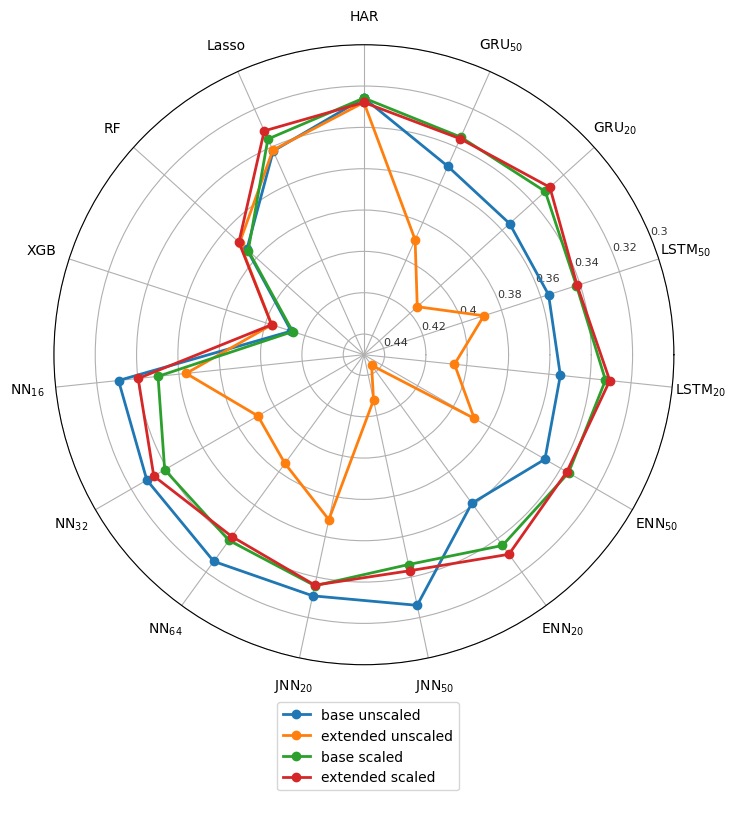

In [51]:
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, polar=True)

angles = [(n/float(len(m)) * 2 * np.pi + np.radians(90)) % (2*np.pi) for n in range(len(m))]
angles += angles[:1]  

labels = ['base unscaled', 'extended unscaled', 'base scaled', 'extended scaled']
for i, v in enumerate(d):
    values = v + v[:1]  
    ax.plot(angles, values, linewidth=2, linestyle='-', marker='o', label=labels[i])

ax.set_xticks(angles[:-1], m)
ax.tick_params(axis='x', which='both', pad=10)
ax.set_ylim(0.45, 0.3)

yt=[np.round(x, 2) for x in np.arange(0.44, 0.3, -0.02)]
ax.set_yticks(yt)
ax.set_yticklabels(yt, fontsize=8, alpha = 0.8)
        
ax.grid(True)
fig.legend(loc='outside lower center',  borderaxespad=2.5)

plt.show()


In [19]:
av_data = pd.DataFrame(d)
av_data.columns = m
av_data.index = ['base unscaled', 'extended unscaled', 'base scaled', 'extended scaled']
av_data

,HAR,Lasso,RF,XGB,NN$_{16}$,NN$_{32}$,NN$_{64}$,JNN$_{20}$,JNN$_{50}$,ENN$_{20}$,ENN$_{50}$,LSTM$_{20}$,LSTM$_{50}$,GRU$_{20}$,GRU$_{50}$
base unscaled,0.325793,0.342100,0.373785,0.412984,0.330612,0.328714,0.326397,0.330735,0.326034,0.361161,0.348863,0.354422,0.356054,0.355153,0.350194
extended unscaled,0.327918,0.341650,0.369049,0.403108,0.363502,0.390763,0.384982,0.368399,0.427538,0.443677,0.388362,0.405928,0.388958,0.415265,0.389078
base scaled,0.325793,0.335762,0.374684,0.413781,0.349839,0.338686,0.338924,0.335737,0.346207,0.335920,0.335673,0.332466,0.341876,0.331944,0.334730
extended scaled,0.327918,0.331444,0.368607,0.403018,0.340168,0.332603,0.341261,0.336008,0.343148,0.330642,0.336640,0.330369,0.341531,0.328914,0.335576


In [21]:
# print(av_data.transpose().style.highlight_min(axis=1, props='textbf:--rwrap;').to_latex())

### Section 2 

In [22]:
m_list = [['HAR', '_rv'], ['Lasso_s', '_all'], ['RF_s', '_all'], ['XGB_s', '_all'], ['NN_64', '_rv'], 
          ['J_5_50', '_rv'], ['E_s_3_20', '_all'], ['LSTM_s_3_20', '_all'], ['GRU_s_3_20', '_all']]

n_list = ['HAR', 'Lasso', 'RF', 'XGB', 'NN', 'JNN', 'ENN', 'LSTM', 'GRU']


In [24]:
res_w = pd.DataFrame()

for i, m_w in enumerate(m_list): 
    d = pd.DataFrame()
    for t in ticker_list:
        res_path = 'results/' + m_w[0] + '/' + t + m_w[1] + '.json'
        with open(res_path, 'r') as f:
            r = json.load(f)
        d[t] = r['window_metrics']['mse']
    res_w[n_list[i]] = d.mean(axis=1)

res_w.index = [str(2016+ (i//4))+'-Q'+str(i%4+1) for i in range (1, 34)]
    
rank_w = res_w.rank(axis=1, ascending=True)

# print(res_w.style.highlight_min(axis=1, props='textbf:--rwrap;').to_latex())

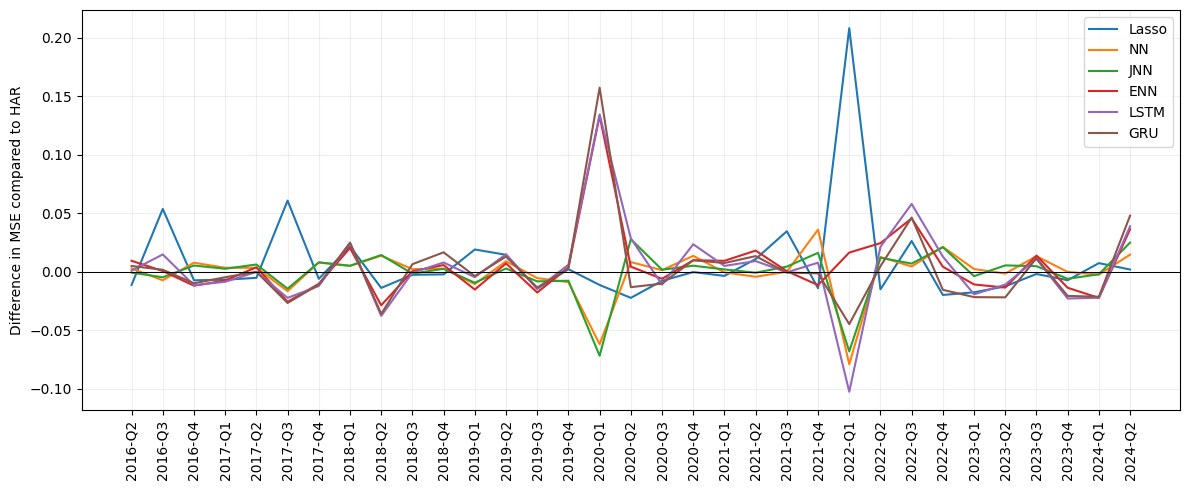

In [25]:
plt.figure(figsize=(12, 5))  
for column in ['Lasso', 'NN', 'JNN', 'ENN', 'LSTM', 'GRU']:
    plt.plot(res_w.index, res_w[column] - res_w['HAR'], label=column) 

plt.axhline(y=0, color='black', linewidth=0.75)
plt.xticks(rotation=90)

plt.ylabel('Difference in MSE compared to HAR')
plt.grid(True, alpha=0.2) 
plt.legend()  
plt.tight_layout() 

plt.show()

In [30]:
num_rows = len(rank_w)
win_counts = (rank_w == 1).sum()
win_rates = round(win_counts / num_rows, 3)

#print(win_rates.sort_values(ascending=False).to_latex(float_format="%.3f", header=False))

### Other metrics

In [72]:
res_t = pd.DataFrame(columns=['model']+ticker_list, index=range(58))

c = 0
for m_name in models_list: 
    for s in ['_rv', '_all']:
        m = m_name+s
        res_t.loc[c, 'model'] = m
        for t in ticker_list:
            res_path = 'results/' + m_name + '/' + t + s+ '.json'
            with open(res_path, 'r') as f:
                r = json.load(f)
            # this cell can be re-run settling the metric here to 'rmse', 'mae', 'mape', or 'r2'
            res_t.loc[c, t] = r['result']['r2']
        c+=1

res_t.set_index('model', inplace=True)   
    
res_t['Mean'] = res_t.mean(axis=1) 

rm = res_t[['Mean']]

u = ['HAR', 'Lasso', 'RF', 'XGB', 'NN_16', 'NN_32', 'NN_64',
     'J_3_20', 'J_5_50', 'E_3_20', 'E_5_50', 'LSTM_3_20', 'LSTM_5_50', 'GRU_3_20', 'GRU_5_50']

s = ['HAR', 'Lasso_s','RF_s', 'XGB_s', 'NN_s_16', 'NN_s_32', 'NN_s_64',
     'J_s_3_20', 'J_s_5_50', 'E_s_3_20', 'E_s_5_50', 'LSTM_s_3_20', 'LSTM_s_5_50', 'GRU_s_3_20', 'GRU_s_5_50']

m = ['HAR', 'Lasso', 'RF', 'XGB', 'NN$_{16}$', 'NN$_{32}$', 'NN$_{64}$',
     'JNN$_{20}$', 'JNN$_{50}$', 'ENN$_{20}$', 'ENN$_{50}$', 'LSTM$_{20}$', 'LSTM$_{50}$', 'GRU$_{20}$', 'GRU$_{50}$']

d = []
d.append(rm.loc[[x+'_rv' for x in u]].values.flatten().tolist())
d.append(rm.loc[[x+'_all' for x in u]].values.flatten().tolist())
d.append(rm.loc[[x+'_rv' for x in s]].values.flatten().tolist())
d.append(rm.loc[[x+'_all' for x in s]].values.flatten().tolist())

av_data = pd.DataFrame(d)
av_data.columns = m
av_data.index = ['base unscaled', 'extended unscaled', 'base scaled', 'extended scaled']
av_data

# for r2, to highlight the best result, highlight_max is used,
# for other metrics, its highlight_min
print(av_data.transpose().style.highlight_max(axis=1, props='textbf:--rwrap;').to_latex())



\begin{tabular}{lrrrr}
 & base unscaled & extended unscaled & base scaled & extended scaled \\
HAR & \textbf{0.574543} & 0.571914 & \textbf{0.574543} & 0.571914 \\
Lasso & 0.552663 & 0.553352 & 0.561111 & \textbf{0.566661} \\
RF & 0.511072 & 0.517370 & 0.509754 & \textbf{0.517983} \\
XGB & 0.459347 & 0.472489 & 0.458307 & \textbf{0.472655} \\
NN$_{16}$ & \textbf{0.567803} & 0.524427 & 0.542991 & 0.555806 \\
NN$_{32}$ & \textbf{0.570578} & 0.488668 & 0.557986 & 0.566298 \\
NN$_{64}$ & \textbf{0.573807} & 0.497537 & 0.556853 & 0.554400 \\
JNN$_{20}$ & \textbf{0.567946} & 0.519019 & 0.561151 & 0.561466 \\
JNN$_{50}$ & \textbf{0.574258} & 0.442236 & 0.545933 & 0.551219 \\
ENN$_{20}$ & 0.527698 & 0.418969 & 0.561396 & \textbf{0.568127} \\
ENN$_{50}$ & 0.543617 & 0.492087 & \textbf{0.561775} & 0.560207 \\
LSTM$_{20}$ & 0.537111 & 0.468074 & 0.566009 & \textbf{0.568488} \\
LSTM$_{50}$ & 0.534329 & 0.490725 & \textbf{0.554166} & 0.554037 \\
GRU$_{20}$ & 0.536164 & 0.456109 & 0.566751 & \textbf